###Demonstrate using the simulator at the region level, deterministic integration, how to smoothly change a model parameter at run time.

``Run Time`` ~ 3 seconds

In [2]:
from tvb.simulator.lab import *

####Perform the simulation

In [3]:
#rs.configure()
LOG.info("Configuring...")

In [5]:
#Initialise a Model, Coupling, and Connectivity.
oscillator = models.Generic2dOscillator()
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([4.0])
white_matter_coupling = coupling.Linear(a=0.0154)

In [6]:
#Initialise an Integrator
heunint = integrators.HeunDeterministic(dt=2 ** -6)

In [7]:
#Initialise some Monitors with period in physical time
momo = monitors.Raw()
mama = monitors.TemporalAverage(period=2 ** -2)

#Bundle them
what_to_watch = (momo, mama)

In [8]:
#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch)
sim.configure()
simulation_length = numpy.array([2 ** 6, ])

In [9]:
# Define a model parameter as a function of time
equation = True
par_length = simulation_length[0] / sim.integrator.dt / mama.istep

# a) as an equally spaced range
if not equation:
    a = numpy.r_[0.0:4.2:par_length.astype(complex)]

# b) using an Equation datatype 
else:
    t = numpy.linspace((sim.integrator.dt * mama.istep) / 2,
                       float(simulation_length[0]),
                       par_length)
                         
    eqn_t = equations.Gaussian()
    eqn_t.parameters["amp"] = 4.2
    eqn_t.parameters["midpoint"] = simulation_length[0] / 2.0
    eqn_t.pattern = t
    a = eqn_t.pattern    


In [10]:

LOG.info("Starting simulation...")
#Perform the simulation

raw_data, raw_time = [], []
tavg_data, tavg_time = [], []


for raw, tavg in sim(simulation_length=float(simulation_length[0])):

    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])
        
        # Change a model parameter at runtime
        sim.model.a = a[len(tavg_time) - 1]

LOG.info("Finished simulation.")

####Plot pretty pictures of what we just did  

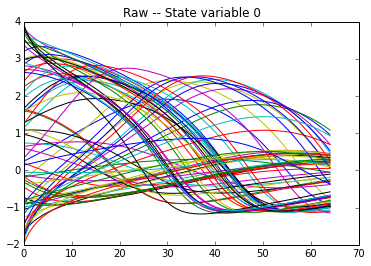

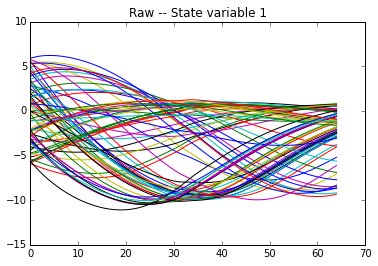

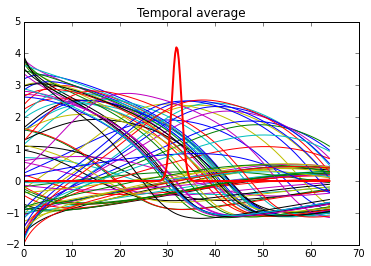

In [11]:
#Plot defaults in a few combinations

#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)

#Plot raw time series
figure(1)
plot(raw_time, RAW[:, 0, :, 0])
title("Raw -- State variable 0")

figure(2)
plot(raw_time, RAW[:, 1, :, 0])
title("Raw -- State variable 1")

#Plot temporally averaged time series + parameter
figure(3)
plot(tavg_time, TAVG[:, 0, :, 0])
plot(tavg_time, a, 'r', linewidth=2)
title("Temporal average")

#Show them
show()